## Challenge Set 4 - Linear Regression and Learning Curves
Date: 02/05/2016  
Name: Ozzie Liu  

In [6]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
#import sklearn cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
random.seed(123)

## Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [7]:
x = [x/10. for x in range(1, 1001, 1)]
beta0 = -3
beta1 = .78
y = [beta0 + beta1 * math.log(n) + random.random() for n in x]
data = pd.DataFrame({'y':y, 'x':x})

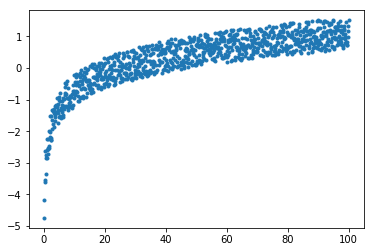

In [9]:
plt.plot(x, y, '.')

In [10]:
data['constant'] = 1
data['x2'] = data['x']**2

In [11]:
# quadratic_fit = np.polyfit(x, y, 2)
quadratic = smf.ols(formula = 'y ~ x2', data=data).fit()
y_pred = quadratic.predict(data[['constant', 'x2']])
quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     934.2
Date:                Sun, 21 Apr 2019   Prob (F-statistic):          2.41e-145
Time:                        19:20:18   Log-Likelihood:                -903.71
No. Observations:                1000   AIC:                             1811.
Df Residuals:                     998   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3453      0.028    -12.169      0.000      -0.401      -0.290
x2             0.0002   6.34e-06     30.565      0.000       0.000       0.000
==============================================================================
Omnibus:                      462.487   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3305.163
Skew:                          -1.988   Prob(JB):                         0.00
Kurtosis:                      10.969   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Quadratic Fit


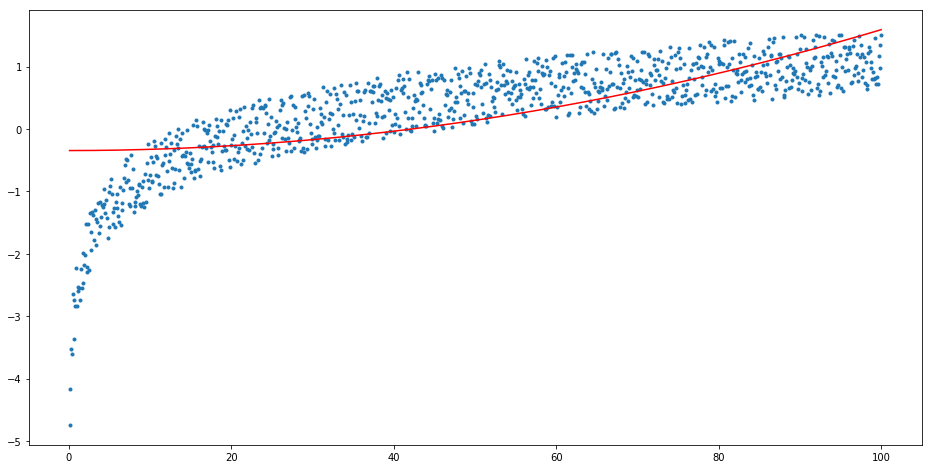

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data.x, data.y, '.', data.x, y_pred, 'r-')
print('Quadratic Fit')

In [13]:
data['logx'] = data['x'].apply(math.log, 1)

In [8]:
logmodel = smf.ols(formula = 'y~logx', data = data).fit()
y_pred = logmodel.predict(data[['constant', 'logx']])
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     7359.
Date:                Fri, 05 Feb 2016   Prob (F-statistic):               0.00
Time:                        17:22:17   Log-Likelihood:                -171.52
No. Observations:                1000   AIC:                             347.0
Df Residuals:                     998   BIC:                             356.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.5571      0.035    -74.034      0.000        -2.625    -2.489
logx           0.7919      0.009     85.783      0.000         0.774     0.810
==============================================================================
Omnibus:                      614.478   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.477
Skew:                           0.070   Prob(JB):                     2.00e-13
Kurtosis:                       1.824   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Logarithmic Fit


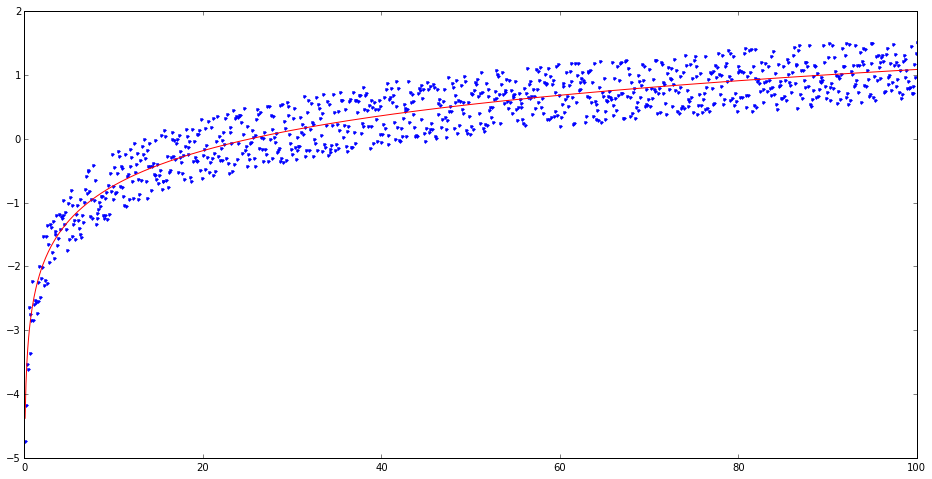

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data.x, data.y, '.', data.x, y_pred, 'r-')
print 'Logarithmic Fit'

## Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [16]:
## Set up data frame with generated data
x = [x/10. for x in range(1, 1001, 1)]
beta0 = -44
beta1 = 3.32
beta2 = 0.1234
y = [beta0 + beta1*n + beta2*(n**2) + (random.random()-1)*4 for n in x]
data = pd.DataFrame({'y':y, 'x':x})
data['constant'] = 1
data['x2'] = data['x']**2

In [19]:
data.head()

,y,x,constant,x2
0,-47.411376,0.1,1,0.01
1,-43.448889,0.2,1,0.04
2,-44.622662,0.3,1,0.09
3,-43.828439,0.4,1,0.16
4,-42.714798,0.5,1,0.25


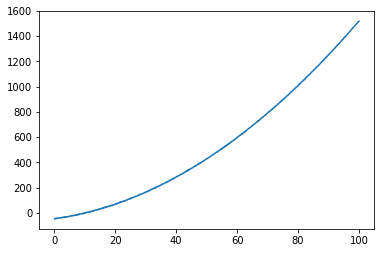

In [17]:
plt.plot(x,y)

In [18]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(data[['constant', 'x', 'x2']], 
                                                                             data.y, train_size = 0.75)

NameError: name 'sklearn' is not defined

In [12]:
model2 = sm.OLS(y_train, x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.925e+07
Date:                Fri, 05 Feb 2016   Prob (F-statistic):               0.00
Time:                        17:22:18   Log-Likelihood:                -1175.9
No. Observations:                 750   AIC:                             2358.
Df Residuals:                     747   BIC:                             2372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant     -45.9727      0.126   -365.051      0.000       -46.220   -45.725
x              3.3202      0.006    572.002      0.000         3.309     3.332
x2             0.1234   5.62e-05   2193.684      0.000         0.123     0.123
==============================================================================
Omnibus:                      534.494   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.364
Skew:                           0.034   Prob(JB):                     1.41e-10
Kurtosis:                       1.797   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
y_train_pred = model2.predict(x_train)

In [14]:
## helper function to calculate mean square error
def mean_square_error(a, b):
    return np.mean([(a-b)**2 for a,b in zip(a,b)])

In [15]:
mean_square_error([0,0], [2,4])

10.0

In [16]:
mean_square_error(y_train_pred, y_train)

1.3468539070904033

In [17]:
## Perform model on test set
y_test_predict = model2.predict(x_test)
mean_square_error(y_test_predict, y_test)

1.331295956692369

## Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error  
test error  
R squared  
AIC

In [18]:
data = pd.DataFrame({'y':y, 'x':x})

In [19]:
def polynomial_fit(df, order):
    columns = []
    
    for n in range(order+1):
        col = 'x'+str(n)
        columns.append(col)
        df[col] = df['x']**n
        
    x = df[columns]
    y = df.y
    
    x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, train_size = 0.75)
    
    model = sm.OLS(y_train, x_train).fit()

    y_train_hat = model.predict(x_train)
    training_error = mean_square_error(y_train, y_train_hat)
    print model.mse_resid
    y_test_hat = model.predict(x_test)
    testing_error = mean_square_error(y_test, y_test_hat)
    
    return [training_error, testing_error, model.rsquared, model.aic]

In [20]:
orders = range(7)
results = [polynomial_fit(data, n) for n in orders]

218304.332839
8597.14313086
1.32194892546
1.30389456835
1.34515198775
1.30422159344
1.34806710963


In [21]:
train_error = [n[0] for n in results]
test_error = [n[1] for n in results]
r2 = [n[2] for n in results]
aic = [n[3] for n in results]

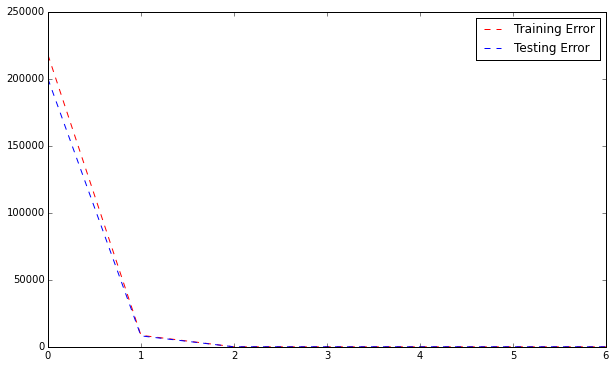

In [22]:
plt.figure(figsize=(10,6))
plt.plot(orders, train_error, 'r--', label = 'Training Error', )
plt.plot(orders, test_error, '--', label = 'Testing Error')
plt.legend()

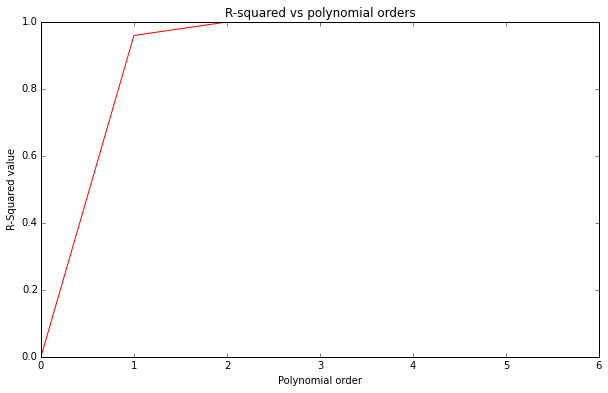

In [23]:
plt.figure(figsize=(10,6))
plt.plot(orders, r2, 'r-' )
plt.title('R-squared vs polynomial orders')
plt.xlabel('Polynomial order')
plt.ylabel('R-Squared value')

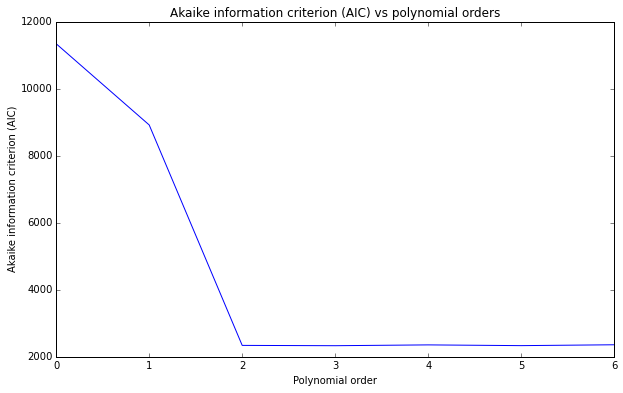

In [24]:
plt.figure(figsize=(10,6))
plt.plot(orders, aic, 'b-' )
plt.title('Akaike information criterion (AIC) vs polynomial orders')
plt.xlabel('Polynomial order')
plt.ylabel('Akaike information criterion (AIC)')

## Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [25]:
## Function that models a quadratic regression line and return the training and test error

def regression_error(df, m):
    ## slices the dataframe
    df = df[:m]
        
    x = df.drop(['y'],1)
    y = df.y
    
    x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, train_size = 0.75)
    
    model = sm.OLS(y_train, x_train).fit()

    y_train_hat = model.predict(x_train)
    training_error = mean_square_error(y_train, y_train_hat)
#     print model.mse_resid
    y_test_hat = model.predict(x_test)
    testing_error = mean_square_error(y_test, y_test_hat)
    
    return [training_error, testing_error]

In [26]:
## Build a list of data points from 5 to 100.
m = range(5,101, 5)
results4 = [regression_error(data, k) for k in m]

In [27]:
train_error = [a[0] for a in results4]
test_error = [a[1] for a in results4]

Training and Testing Error vs. Data points (m) built on model


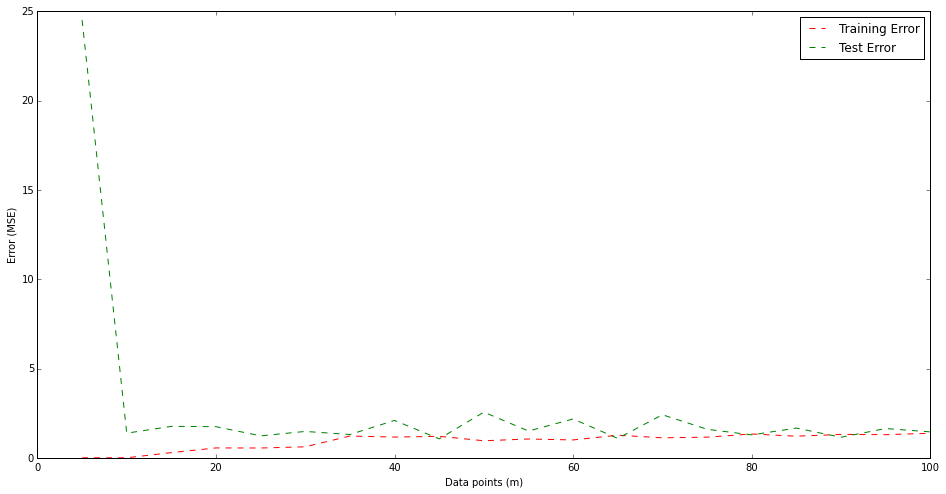

In [28]:
plt.figure(figsize=(16,8))
plt.plot(m, train_error, 'r--', label = 'Training Error')
plt.plot(m, test_error, 'g--', label = "Test Error")
plt.legend()
plt.xlabel('Data points (m)')
plt.ylabel('Error (MSE)')
print 'Training and Testing Error vs. Data points (m) built on model'